In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyslaw.lineartheory import LinearModel

# Analytical solution of uniform flow over a surface corrugation

TODO:
- Add short description here (include author?)

Flow parameters

In [3]:
U = 4     # Wind speed [m/s]
N = 0.023 # Brunt-Vaisala frequency [1/s]

Hill shape

In [4]:
hmax = 50.0 # Amplitude of the corrugation [m]

# Wavelength of the corrugation
Lprop = 2000 # Wave length leading to propagating waves [m]
Levan = 1000 # Wave length leading to propagating waves [m]

# Shape function of the hill
h = lambda x,L: hmax*(1+np.cos(2*np.pi*x/L))

Numerical parameters

In [5]:
Lx = 100.0e3  # Length of the numerical domain [m]
Nx = int(1e4) # Number of grid points

Parameters for visualization

In [6]:
Lz = 1.0e3  # Height up to which solution is calculated [m]
Nz = 101    # Number of vertical levels to be used

## Solve flow problem

Create numerical grid

In [7]:
xs,dx = np.linspace(-Lx/2,Lx/2,Nx,endpoint=False,retstep=True)
print('Horizontal grid resolution is {} m'.format(dx))

Horizontal grid resolution is 10.0 m


In [8]:
zs,dz = np.linspace(0,Lz,Nz,retstep=True)
print('Vertical resolution is {} m'.format(dz))

Vertical resolution is 10.0 m


In [9]:
prop_wave = LinearModel(xs,h(xs,Lprop),U,N)
evan_wave = LinearModel(xs,h(xs,Levan),U,N)

In [10]:
eta_prop = prop_wave.solve('eta',zs)
u_prop = prop_wave.solve('u',zs)
w_prop = prop_wave.solve('w',zs)
p_prop = prop_wave.solve('p',zs)

In [11]:
eta_evan = evan_wave.solve('eta',zs)
u_evan = evan_wave.solve('u',zs)
w_evan = evan_wave.solve('w',zs)
p_evan = evan_wave.solve('p',zs)

## Visualization

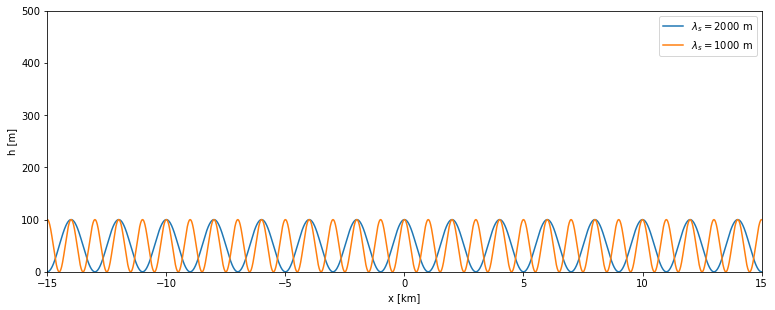

In [12]:
f,ax = plt.subplots(1,1,figsize=(12.8,4.8))
ax.plot(xs/1.e3,h(xs,Lprop),label=r'$\lambda_s = 2000$ m')
ax.plot(xs/1.e3,h(xs,Levan),label=r'$\lambda_s = 1000$ m')
_ = ax.set(xlim=[-15,15],ylim=[0,500],xlabel='x [km]',ylabel='h [m]')
_ = ax.legend()

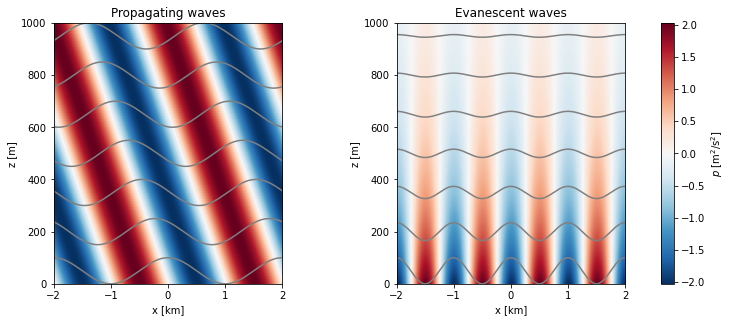

In [13]:
f,ax=plt.subplots(1,2,figsize=(12.8,4.8))
plt.subplots_adjust(wspace=0.5)

im=ax[0].imshow(p_prop.T,
             origin='lower',
             extent=[xs[0]/1e3, xs[-1]/1e3, zs[0], zs[-1]],
             aspect='auto',
             cmap='RdBu_r',)
im=ax[1].imshow(p_evan.T,
             origin='lower',
             extent=[xs[0]/1e3, xs[-1]/1e3, zs[0], zs[-1]],
             aspect='auto',
             cmap='RdBu_r',)

# Plot streamlines
for kz in range(0,100,15):
    ax[0].plot(xs/1e3,eta_prop[:,kz]+zs[kz],'gray')
    ax[1].plot(xs/1e3,eta_evan[:,kz]+zs[kz],'gray')
    
cbar = f.colorbar(im,ax=ax,shrink=1.0,label=r'$p$ [m$^2$/s$^2$]')
_ = ax[0].set(xlim=[-2,2],xlabel='x [km]',ylabel='z [m]',title='Propagating waves')
_ = ax[1].set(xlim=[-2,2],xlabel='x [km]',ylabel='z [m]',title='Evanescent waves')